In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('movie_metadata.csv')
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

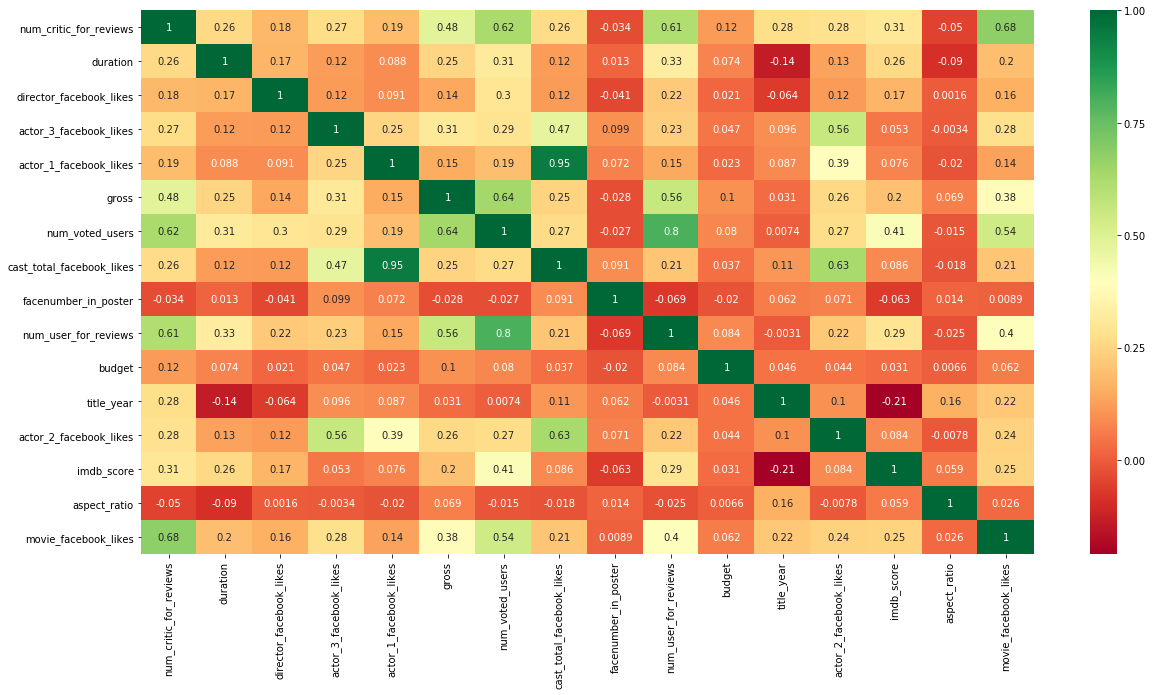

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

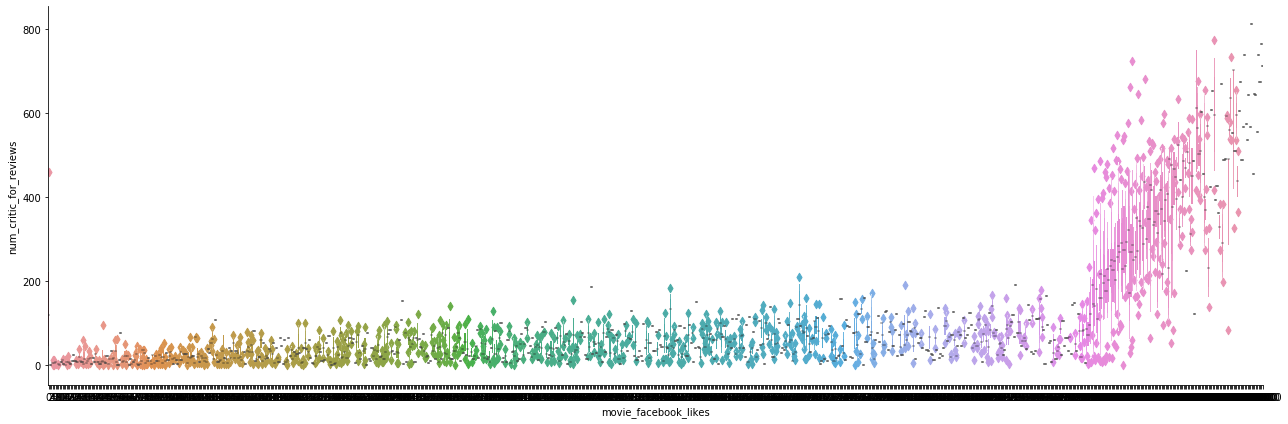

In [17]:
sns.catplot(x = 'movie_facebook_likes', y = 'num_critic_for_reviews', data = data.sort_values('num_critic_for_reviews', ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

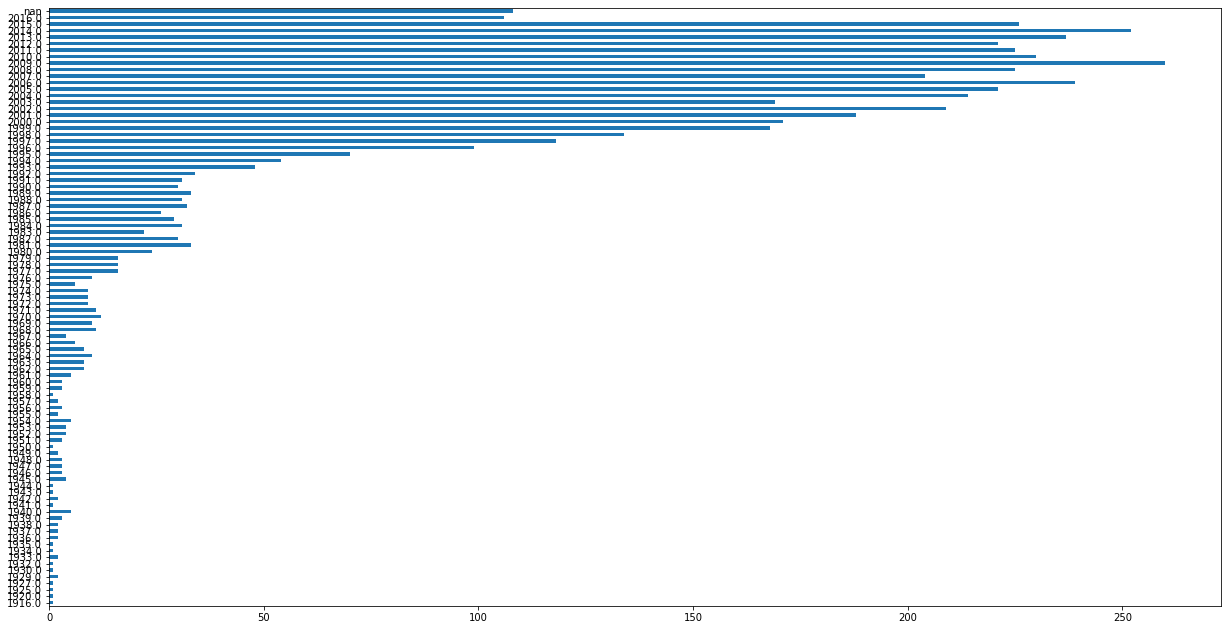

In [23]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(21,11))
plt.show()

In [24]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [25]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [26]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [27]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [13]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [14]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action Adventure Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,Harry Potter and the Half-Blood Prince


In [29]:
data['movie_title'] = data['movie_title'].str.lower()

In [31]:
# null terminating char at the end
data['movie_title'][0]

'avatar\xa0'

In [33]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [34]:
data['movie_title'][0]

'avatar'

In [39]:
data.to_csv('data.csv',index=False)